
# Follow-up exercises: Introduction to Python


Student: Nicolò Trevisani


## 0. From the scipy-lectures, reproduce and comment the basic examples from the introduction sections


The [spicy lectures](http://scipy-lectures.org/intro/language/python_language.html) introduces some basic concepts of python. Among them:
- Basic Types; 
- Control Flow; 
- Functions Definition.

Here, I am listing the most interesting examples I found, among the ones presented there.

### Lists


Regarding lists, I would like to mention a feature of the _slicing_ that I did not think it was possible until we saw it in the lectures.

Using the *slicing*, it is in fact possible to insert new elements in a list in a specific position.

In [1]:
colors = ['red', 'blue', 'green', 'black', 'white']

# I want to insert three new elements to the 'color' list,
# just after the 'blue' element
colors[2:2] = ['gray', 'purple', 'pink']

colors

['red', 'blue', 'gray', 'purple', 'pink', 'green', 'black', 'white']

But also replace one (or more) element with an arbitrary number of new elements.

In [2]:
colors = ['red', 'blue', 'green', 'black', 'white']

# I want to remove the 'green' element and insert three new elements 
# to the 'color' list
colors[2:3] = ['gray', 'purple', 'pink']

colors

['red', 'blue', 'gray', 'purple', 'pink', 'black', 'white']

### Control flow

Also for control flow, I try to put here examples of aspects of python I was not expecting.

The first thing is the structure of the _for_ iteration, which can be *closed* with an else.

In [3]:
# In this case, the 'for' ends with an 'else' statement
for word in ('cool', 'powerful', 'readable'):
    print('Python is %s' % word)
else:
    print("But also many more things")

Python is cool
Python is powerful
Python is readable
But also many more things


In [4]:
# Here, the 'else' statement is skipped, since the 'for'
# was broken before finishing
for word in ('cool', 'powerful', 'readable'):
    print('Python is %s' % word)
    if word == 'readable':
        break
else:
    print("But also many more things")    

Python is cool
Python is powerful
Python is readable


I found interesting also the _enumerate_ function, which allows to easily iterate over the indics and the items of a list.

In [5]:
words = ('cool', 'powerful', 'readable')
for index, item in enumerate(words):
    print((index, item))

(0, 'cool')
(1, 'powerful')
(2, 'readable')


### Functions

Again, some examples of counterintuitive (at least to me) behaviours of functions in python.

First of all, default values are evaluated when the function is defined, not when it is called.
This fact produces different results when the _default value_ is mutable or immutable. 

In [6]:
# Using an immutable object (int)
bigx = 10

def double_it(x=bigx):
     return x * 2

bigx = 1e9  # Now really big
print(double_it())

# Now explicitly passing the new value of bigx
print(double_it(1e9))


20
2000000000.0


In this first case, the default value bigx is evaluated when the function double_it is created. 
This means that when double_it is called without passing it any explicit value, it uses the value of bigx it got when it was defined.
Of course, if the new value of bigx is explicitly given to the function, it uses the new one.

On the other hand, using a mutable type object in a keyword argument (and modifying it inside the function body) produces a different result.

In [7]:
def add_to_dict(args={'a': 1, 'b': 2}):
    for i in args.keys():
        args[i] += 1
    print(args)

add_to_dict()
add_to_dict()
add_to_dict()


{'a': 2, 'b': 3}
{'a': 3, 'b': 4}
{'a': 4, 'b': 5}


Since dictionaries are mutable objects, their values can actually be modified permanently by the function.

A similar example is given by the following exercise.

In general, when a variable is passed to a function, python gives the reference to the object to which the variable refers (value), not the variable itself.

This means that if the value passed to a function is immutable, the function does not modify the variable. On the other hand, if the value is mutable, the function may modify the variable.

In [8]:
def try_to_modify(x, y, z):
    x = 23
    y.append(42)
    z = [99] # new reference
    print("x:",x)
    print("y:",y)
    print("z:",z)

a = 77    # immutable variable
b = [99]  # mutable variable
c = [28]

try_to_modify(a, b, c)

print()

print("a:",a)
print("b:",b)
print("c:",c)

x: 23
y: [99, 42]
z: [99]

a: 77
b: [99, 42]
c: [28]


In this example:
- a = 77: an int is an immutable object and cannot be modified by the function;
- b = [99]: a list is a mutable object, so that _appending_ a new value to y inside the function actually modifies also b;
- c = [28]: also c is a list, so that it is a mutable object. On the other hand, z gets assigned a new value _inside_ the function. In this case, z 'lives' only inside the scope of the function, so that outside c keeps the value it was originally assigned.

In general, variables declared outside the function can be referenced within the function.

In [9]:
x = 5

def addx(y):
    return x + y

addx(10)

15

These variables can be modified inside the function, but the changes are not propagted outside it. For example:

In [10]:
x = 5

def setx(y):
    x = y
    print('x is %d' % x)

setx(10)
print(x)

x is 10
5


If we really want to do so, we need to decalre the variables as **global** inside the function.

In [11]:
x = 5

def setx(y):
    # now we can globally modify x
    global x 
    x = y
    print('x is %d' % x)

setx(10)
print(x)

x is 10
10


## 1. Compute the decimals of $\pi$ using the Wallis formula


According to the [Wallis formula](https://en.wikipedia.org/wiki/Wallis_product), $\pi$ can be obtained by the following product:

# $$ \pi = 2 \prod_{i = 1}^{\infty} \frac{4 i^2}{4 i^2 - 1 } $$

I decided to implement it by using a simple _for_ iteration, as follows:

In [12]:
import math

# Getting the value of pi from python, to estimate the precision of the algorithm
math_pi = math.pi

# Initializing the 'pi' I want to use in the code
pi = 2

# Asking how many iterations the user would like to use for pi estimation
up_to = input("Please tell me how many products to you want to compute: ")
print("\n")

# Check if the 'up_to' parameter is an int
try:
    up_to = int(up_to)
    # Check if 'up_to' is positive
    if up_to > 0:
        # Actual calculation
        for i in range(1,up_to):
            pi *= 4*(i**2) / (4*(i**2) - 1)
        # Just printing the result once the iterations are done
        else:
            print("After {0} iterations, I get the following value for pi: {1:.6f}".format(up_to, pi))
            print("Comparing with the value of pi I get from python (%.6f)," %(math_pi))
            precision = 100. * (math_pi - pi) / (math_pi)
            print("I can say I reached a precision of %.6f%%" %(precision))
    else:
        print("I need a positive number as input:") 
        print(up_to, "is not a positive number")        
except ValueError:
    print("I need an integer number as input:") 
    print(up_to, "is not an integer number")

Please tell me how many products to you want to compute: 10


After 10 iterations, I get the following value for pi: 3.060035
Comparing with the value of pi I get from python (3.141593),
I can say I reached a precision of 2.596075%


After some tests, it seems that the precision of the algorithm, defined as the _relative distance_ between the result and the actual value of $\pi$, goes as $\frac{25}{n}$%.

e.g.:
- After 100 iterations: 0.25%
- After 1000 iterations: 0.025%
- After 10000 iterations: 0.0025%

## 2. Write a function that displays the n first terms of the Fibonacci sequence



The [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number) is defined such that each number is the sum of the two preceding ones, starting from 0 and 1:

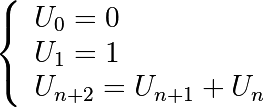

The implementation of the sequence itself is just a small part of the function and is based on a _for_ iteration.

I tried to focus more on the _defensive programming_ part, trying to ensure that in case incorrect inputs are given, the code does not crash, but gives a short explanation of why the output is not the expected one.
In particular, I implemented the following *protections*:
- the variable _n_ has to be an integer. If not, a _ValueError_ exception is called;
- the number _n_ of terms has to be positive;
- in case _n_ is 0, a message says that no output will be shown, since this is the meaning of requiring 0 element of a sequence.

The same protections have been implemented in the previous exercise. In that case, on the other hand, I did not use a function to define the actual implementation of the calculation and this lead to a less readable and more complex code.
This can be one of the many reason to prefer modular programming.

In [13]:
def fibonacci(n = 10):
    """ This function prints the first n terms of the fibonacci sequence.
    
    If 'n' is not specified, 10 is taken as default value.
    The funcion accepts only positive integer numbers as input.
    No output is produced in case 'n' is 0.
    """
       
    # Check if the 'n' parameter is an int
    try:
        n = int(n)
    except ValueError:
        print("I need an integer number as input:") 
        print(n, "is not an integer number")
        return
        
    # If 'n' is an int, it has to be positive
    if n < 0:
        print("I need a positive integer number as input:")
        print(n, "is negative")
        return

    # Special case: 'n' = 0 
    if n == 0:
        print("You are asking me to print the first 0 terms of a sequence!")
        print("No output will be produced.")
        return
    
    # Special case: 'n' = 1
    if n == 1:
        print("The first term of the fibonacci sequence is:")
    else:
        print("The first " + str(n) + " terms of the fibonacci sequence are:")

    # Actual implementation of the sequence
    a, b = 0, 1
    for i in range(n):
        print(a, end = '\n')
        a, b = b, a + b

# Just to check if the dockstring is properly shown        
#fibonacci?
        
n_terms = input("Please tell me how many terms of the Fibonacci sequence you want me to print: ")
print()
fibonacci(n_terms)

Please tell me how many terms of the Fibonacci sequence you want me to print: 10

The first 10 terms of the fibonacci sequence are:
0
1
1
2
3
5
8
13
21
34


## 3. Implement the quicksort algorithm


The quicksort algorithm allows to efficiently order the elements of an array.
The idea is to select one element of the array, called pivot, and to put to its _left_ all the elements of the array smaller to it and to its _right_ all the elements greater or equal to it.
Operating iteratively on the two subsets of elements of the array created, it is possible to sort the array.

The general idea of how the algoritm works is described below:

    function quicksort(array)
        var list less, greater
        if length(array) < 2
            return array
        select and remove a pivot value pivot from array
        for each x in array
            if x < pivot + 1 then append x to less
            else append x to greater
        return concatenate(quicksort(less), pivot, quicksort(greater))

The python implementation follows:

In [14]:
def quicksort(array): 
    """This function uses quicksort to order arrays."""

    # Check if the 'array' parameter is a list
    # of real numbers
    try:
        test = list(array)
    except TypeError:
        print("I need a list:") 
        print(array, "is not a list")
        return

    if (all(isinstance(x, int) for x in array) == False
    and all(isinstance(x, float) for x in array) == False): 
        print("This is not a list of real numebrs")
        print("I do not know how to sort this")
        return

    # Initialize three lists of elements of the array
    # depending on their relative value with respect to the pivot
    smaller = []
    pivot = []
    greater = []

    # Do this only if the array contains more than one element
    if len(array) > 1:
        # The pivot is the element in the middle of the array
        pi = array[len(array) // 2]
        # Pivot just has one value
        pivot.append(pi)
        # Scan the array and split it depending on the 
        # values of the elements with respect to the pivot
        for x in array[1:]:
            if x < pi:
                smaller.append(x)
            else: 
                greater.append(x)
        # Return the concatenation of the three lists
        # properly ordered
        return quicksort(smaller)+pivot+quicksort(greater)  
    # If the array has just one element,
    # directly return it
    else:
        return array

In [15]:
from random import randint

arr=[]
for i in range(10):
    arr.append(randint(1, 100))

# Just for testing with lists of
# non-real numbers
#arr.append(2j)
#arr = "pizza"

print("Original array:")
print(arr)

print()

# Check if the 'array' parameter is a list
try:
    arr = list(arr)
    new_arr = quicksort(arr)
    print ("Sorted array:") 
    print(new_arr)    
except TypeError:
    print("I need a list:") 
    print(arr, "is not a list")


Original array:
[94, 15, 26, 72, 65, 41, 53, 20, 36, 74]

Sorted array:
[20, 20, 36, 36, 41, 41, 41, 53, 74, 74]


Nevertheless, two schemes are typically followed to implement the quicksort algortihm:
- the Lomuto partition scheme;
- the Hoare partition scheme.

Both of them separate the the work in two different functions:
- the first one (*partition*) selects a set of elements of the array and a pivot, putting all the elements of the subset smaller than the pivot to the _left_ of it and all the elements of the subset greater or equal to the pivot to its *right*;
- the second one (*quicksort*) recursively calls the _partition_ function to actually sort the full array.

### Lomuto partition scheme


This scheme chooses a pivot that is typically the last element in the array. 
Given a subset of the array that goes from position lo to position hi, the pivot is array[hi].
The algorithm then starts by assigning to an index i the starting position (lo) and scans the array through and index j that spans from lo to hi, looking for elements smaller than the pivot. 
When an element smaller than the pivot is found at the position j, the element at position i and position j are swapped and i is increased by 1, so that i keeps pointing at the leftmost element inspected which is greater than the pivot.
Eventually, the elements from lo to i-1 are smaller than the pivot and the elements from i+1 to j are greater than the pivot. The position i, occupied by the pivot, is then used to further split the array in two parts, on which the algorithms operates iteratively until it is sorted.

A description in pseudo-code is given below:

    algorithm partition(A, lo, hi) is
        pivot := A[hi]
        i := lo
        for j := lo to hi do
            if A[j] < pivot then
                swap A[i] with A[j]
                i := i + 1
        swap A[i] with A[hi]
        return i
    
    algorithm quicksort(A, lo, hi) is
        if lo < hi then
            p := partition(A, lo, hi)
            quicksort(A, lo, p - 1)
            quicksort(A, p + 1, hi)

While the acual python implementation is here:

In [16]:
# Function to select a pivot, and:
# puts all the smaller elements to its left
# puts all the greater elements to its right
# returns the pivot position
def partition2(array, low, high): 
    """ This function uses Lomuto partition scheme to order arrays.

    Given an array, a starting position low, and 
    a stopping position high, the function takes the high-th
    element of the array (pivot) and compares it with the elements of 
    the array between position low and high-1.
    The elements smaller than pivot are put at its left,
    the elements greater than pivot are put at its right.
    Eventually, the position of the pivot after the sorting
    is returned.
    """

    # index of greater element
    i = low - 1          

    # pivot is the last element of the array
    pivot = array[high]     
    
    # iterate over all the elements of the array, but the pivot
    for j in range(low , high): 
  
        # If current element is smaller than or equal to pivot,
        # switch its position with the first element of the array 
        # grater than the pivot
        if array[j] <= pivot:          
            i = i + 1 
            array[i],array[j] = array[j],array[i] 
            
    # Put the pivot just after the last element
    # smaller then or equal to it
    array[i+1],array[high] = array[high],array[i+1] 

    # Return the position of the pivot
    return (i + 1) 


# Actual sorting
def quicksort2(array,low,high):
    """ This function performs the quicksort algorithm following the Lomuto partition scheme.
    
    The implementation relies on the 'partition' function, which
    is defined in this notebook.
    """

    # Check if the 'array' parameter is a list
    # of real numbers
    try:
        test = list(array)
    except TypeError:
        print("I need a list:") 
        print(array, "is not a list")
        return

    if (all(isinstance(x, int) for x in array) == False
    and all(isinstance(x, float) for x in array) == False): 
        print("This is not a list of real numebrs")
        print("I do not know how to sort this")
        return

    # Do this only if the array is not already ordered
    if low < high: 
  
        # Order the array with respect to the pivot
        # and return the correct pivot position
        pi = partition2(array,low,high) 
  
        # Separately sort elements smaller  
        # and greater than the pivot
        quicksort2(array, low, pi - 1) 
        quicksort2(array, pi + 1, high) 
        

In [17]:
from random import randint

arr=[]
for i in range(10):
    arr.append(randint(1, 100))

# Just for testing with lists of
# non-real numbers
#arr.append(2j)
#arr = "pizza"

print("Original array:")
print(arr)

print()

# Check if the 'array' parameter is a list
try:
    arr = list(arr)
    length = len(arr)
    quicksort2(arr, 0, length - 1)
    print ("Sorted array:") 
    print(arr)    
except TypeError:
    print("I need a list:") 
    print(arr, "is not a list")



Original array:
[94, 50, 76, 59, 9, 97, 53, 20, 73, 43]

Sorted array:
[9, 20, 43, 50, 53, 59, 73, 76, 94, 97]


### Hoare partition scheme


This second partition scheme uses two indices to put the elements of the array in the correct position with respect to the pivot:
- i starts by pointing at the starting position;
- j starts by pointing at the stopping position.

The i and the j indices are moved toward each other, until a pair of elements, one greater than or equal to the pivot and one smaller than or equal to the pivot are found in the wrong positions and swapped.
Once the indices get the same value, the algorithm stops and returns the indices value, which is used to further split the array in two parts, on which the algorithms operates iteratively until it is sorted.
Thanks to the fact that the two indices look for a pair of elements in the _wrong_ position, this partition scheme allows to reduce the number of swaps with respect to the Lomuto one, so that it is, in principle, more efficient.

A description in pseudo-code is given here:

    algorithm partition(A, lo, hi) is
        pivot := A[lo + (hi - lo) / 2]
        i := lo - 1
        j := hi + 1
        loop forever
            do
                i := i + 1
            while A[i] < pivot
            do
                j := j - 1
            while A[j] > pivot
            if i >= j then
                return j
            swap A[i] with A[j]
        
    algorithm quicksort(A, lo, hi) is
        if lo < hi then
            p := partition(A, lo, hi)
            quicksort(A, lo, p)
            quicksort(A, p + 1, hi)

While the acual python implementation follows:

In [18]:
def partition3(array, low, high):
    """ This function orders arrays using the Hoare partition scheme.

    Given an array, a starting position (low), and 
    a stopping position (high), the function takes the
    element in the middle between low and high as pivot.
    The function then search for elements greater than the
    pivot at its left and element smaller than the pivot at its
    right, and swap them. 
    Doing so: 
    all the elements smaller than the pivot are put at its left, and
    all the elements greater than the pivot are put at its right.
    """
    # Set the pivot as the element in the middle of the array
    pivot = array[low + (high - low) // 2]
    # Initialize the indices
    i = low - 1
    j = high + 1
    
    # Infinite loop 
    # It actually exits when the indices get the same value
    while 1:
        # Move i from left to right until an element greater
        # than the pivot is found
        i = i + 1
        while array[i] < pivot:
            i = i + 1
        # Move j from right to left until an element smaller
        # than the pivot is found        
        j = j - 1
        while array[j] > pivot:
            j = j - 1
       
        # If the two indices have the same value,
        # return that value
        if i >= j:
            return j
        
        # Swap the element at the wrong side of the pivot
        array[i], array[j] = array[j], array[i]


# Actual sorting        
def quicksort3(array, low, high):
    """ This function performs the quicksort algorithm following the Hoare partition scheme.
    
    The implementation relies on the 'partition2' function, which
    is defined in this notebook.
    """
    
    # Check if the 'array' parameter is a list
    # of real numbers
    try:
        test = list(array)
    except TypeError:
        print("I need a list:") 
        print(array, "is not a list")
        return

    if (all(isinstance(x, int) for x in array) == False
    and all(isinstance(x, float) for x in array) == False): 
        print("This is not a list of real numebrs")
        print("I do not know how to sort this")
        return
    
    # Do this only if the array is not already ordered
    if low < high:
        
        # Order the array with respect to the pivot
        # and return the correct pivot position
        pi = partition3(array, low, high) 
          
        # Separately sort elements at the left
        # and at the right with respect to the 'pi'
        # element given by the previous iteration
        quicksort3(array, low, pi)
        quicksort3(array, pi + 1, high)

In [19]:
from random import randint

arr=[]
for i in range(10):
    arr.append(randint(1, 100))

print("Original array:")
print(arr)

#arr.append(2j)
#arr = "pizza"

print()

# Check if the 'array' parameter is a list
try:
    arr = list(arr)
    length = len(arr)
    quicksort3(arr, 0, length - 1)
    print ("Sorted array:") 
    print(arr)    
except TypeError:
    print("I need a list:") 
    print(arr, "is not a list")

Original array:
[52, 25, 78, 76, 52, 71, 25, 88, 66, 51]

Sorted array:
[25, 25, 51, 52, 52, 66, 71, 76, 78, 88]
